In [2]:
from IPython.display import Image
Image?

Init signature:
Image(
    data=None,
    url=None,
    filename=None,
    format=None,
    embed=None,
    width=None,
    height=None,
    retina=False,
    unconfined=False,
    metadata=None,
)
Docstring:      An object that wraps data to be displayed.
Init docstring:
Create a PNG/JPEG/GIF image object given raw data.

When this object is returned by an input cell or passed to the
display function, it will result in the image being displayed
in the frontend.

Parameters
----------
data : unicode, str or bytes
    The raw image data or a URL or filename to load the data from.
    This always results in embedded image data.
url : unicode
    A URL to download the data from. If you specify `url=`,
    the image data will not be embedded unless you also specify `embed=True`.
filename : unicode
    Path to a local file to load the data from.
    Images from a file are always embedded.
format : unicode
    The format of the image data (png/jpeg/jpg/gif). If a filename or URL is given
   

# introduction to icepyx
This notebook offers a quick introduction to the Python library `icepyx`.
1. What is `icepyx`?
2. Motivation and background (why)?
3. What can it do (as of Sept. 2020)?
4. Where’s it going?
5. What’s in it for me?
6. But I don’t know how to develop software…
7. How do I get it?
8. How to get involved (resources)


#### Credits
* Notebook by: Jessica Scheick and Anthony Arendt
* Presented at: ICESat-2 Science Team (ST) meeting, 22 September 2020

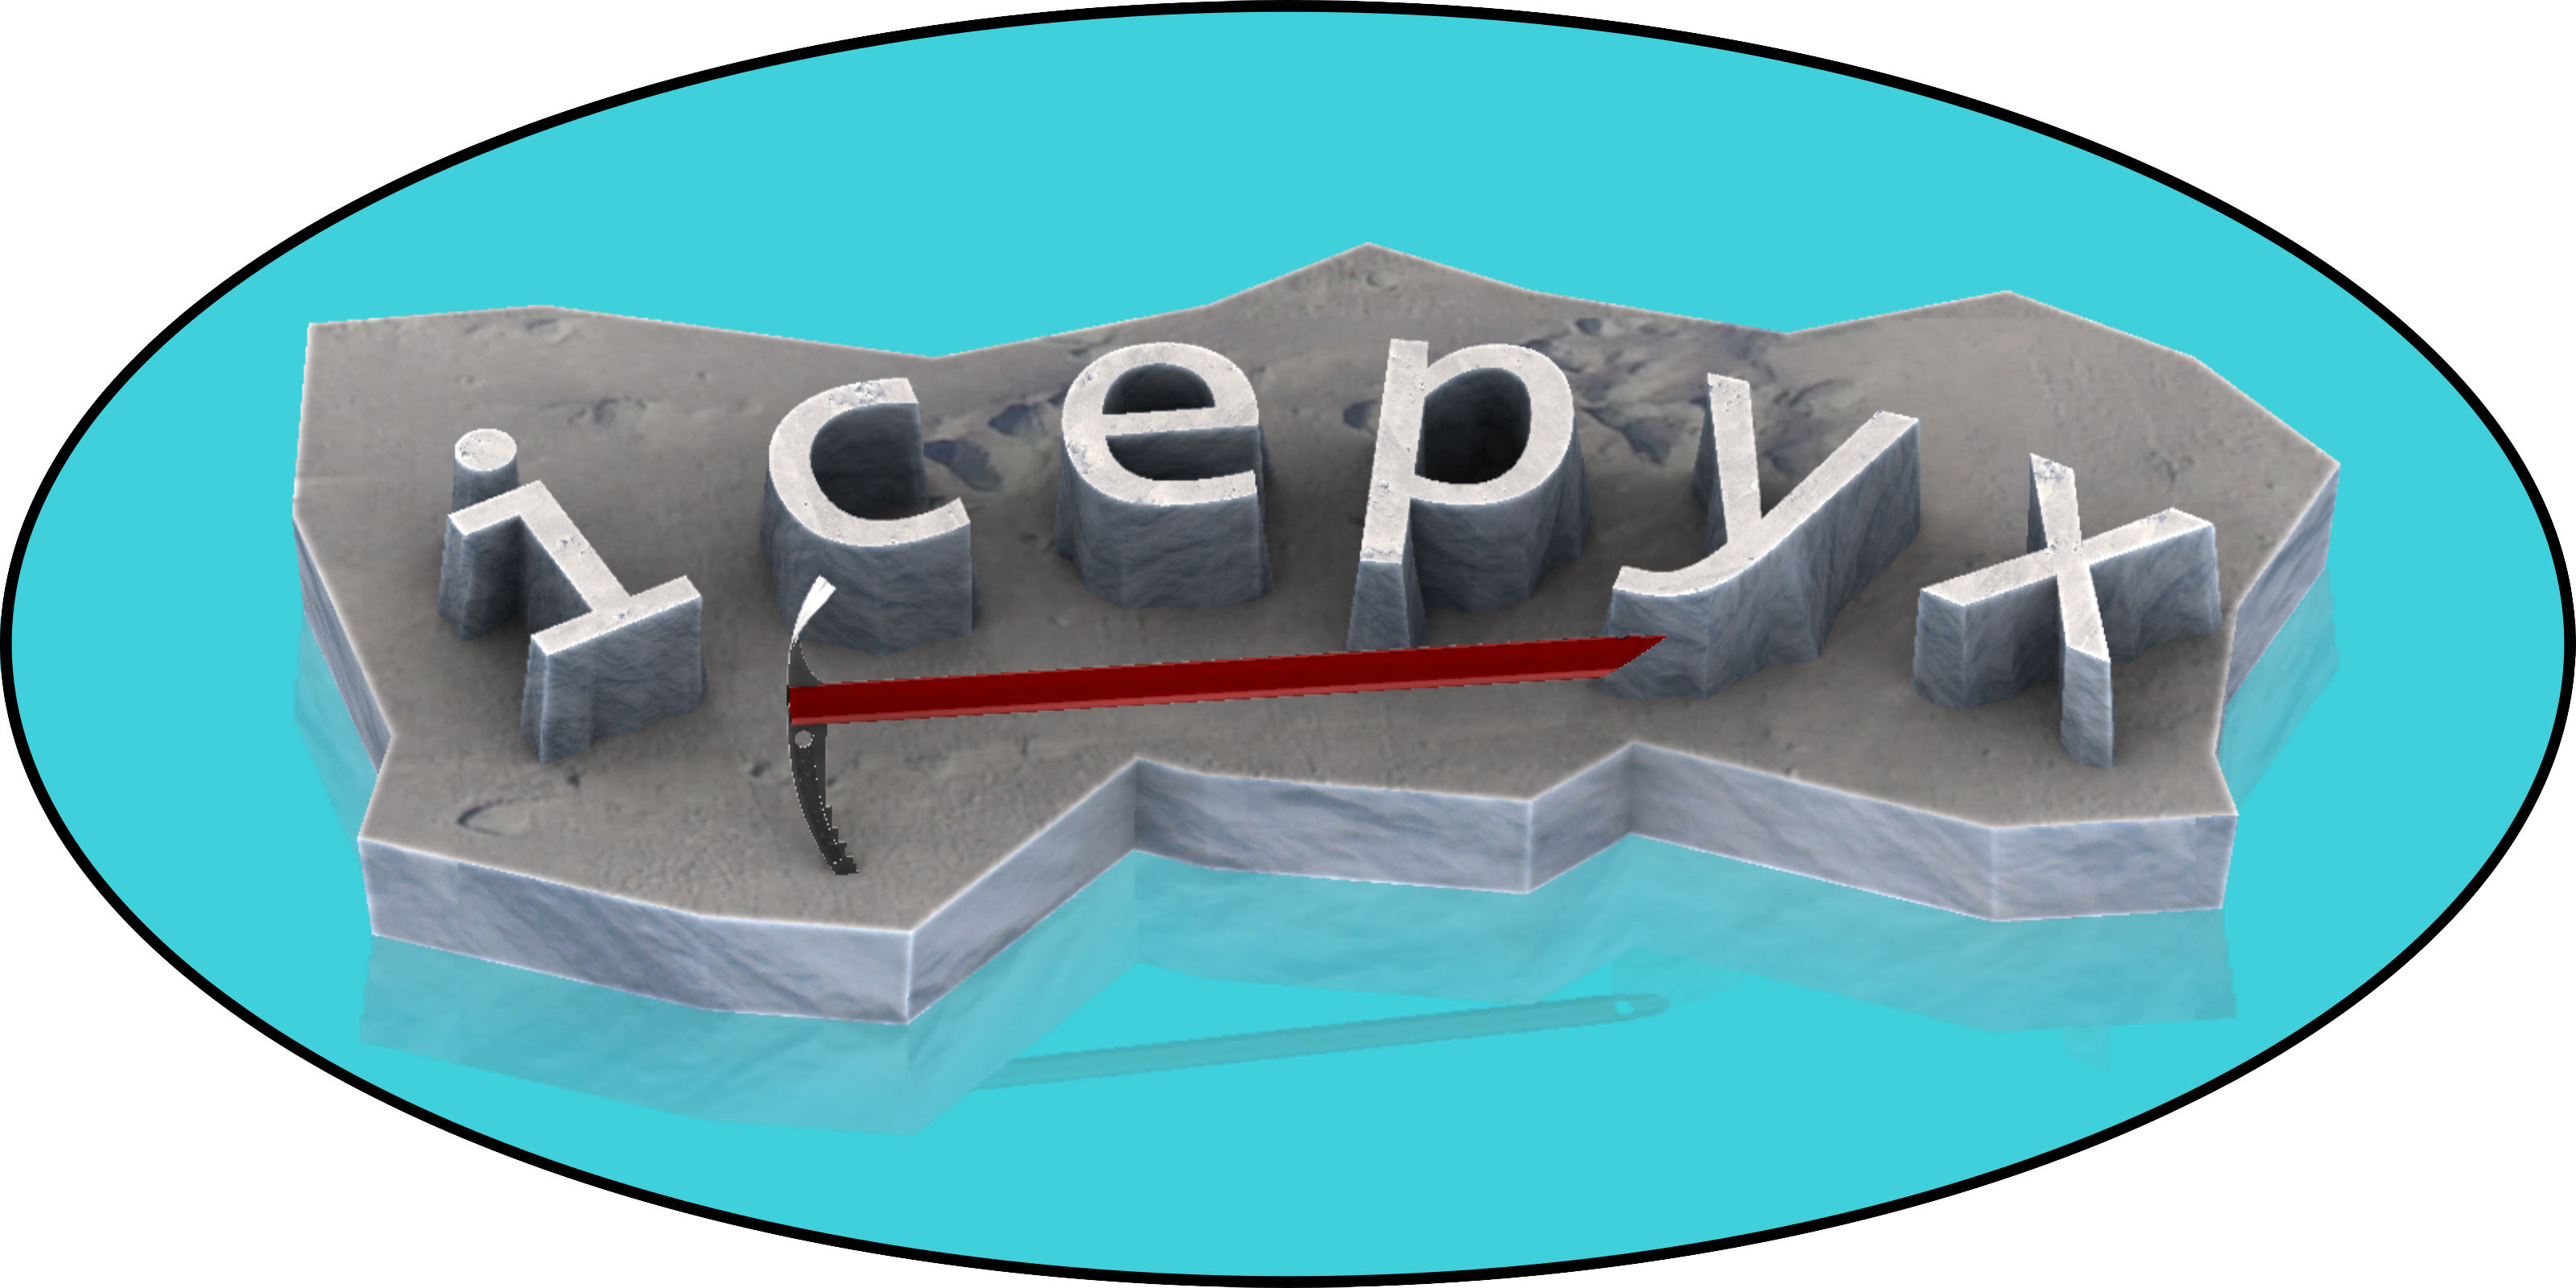

In [5]:
Image("../doc/source/_static/icepyx_v2_oval_orig_nobackgr.png", width=500)

## 1. What is `icepyx`?

[icepyx](https://icepyx.readthedocs.io/en/latest/) is both an open-source [Python software library](https://pypi.org/project/icepyx/) and a community composed of ICESat-2 data users, developers, and the scientific community. We are working together to develop a shared library of resources - including existing resources, new code, tutorials, and use-cases/examples - that simplify the process of querying, obtaining, analyzing, and manipulating ICESat-2 datasets to enable scientific discovery.

`icepyx` aims to provide a clearinghouse for code, functionality to improve interoperability, documentation, examples, and educational resources that tackle disciplinary research questions while minimizing the amount of repeated effort across groups utilizing similar datasets. `icepyx` also hopes to foster collaboration, open-science, and reproducible workflows by integrating and sharing resources.

## 2. Motivation and Background

At the 2019 ICESat-2 Cryospheric Hackweek, attendees noted a need for a unifying framework to collate and document code for working with ICESat-2 data. `icepyx` began as a hacking project during that event, initially called `icesat2py`.

After the event, a core team of developers

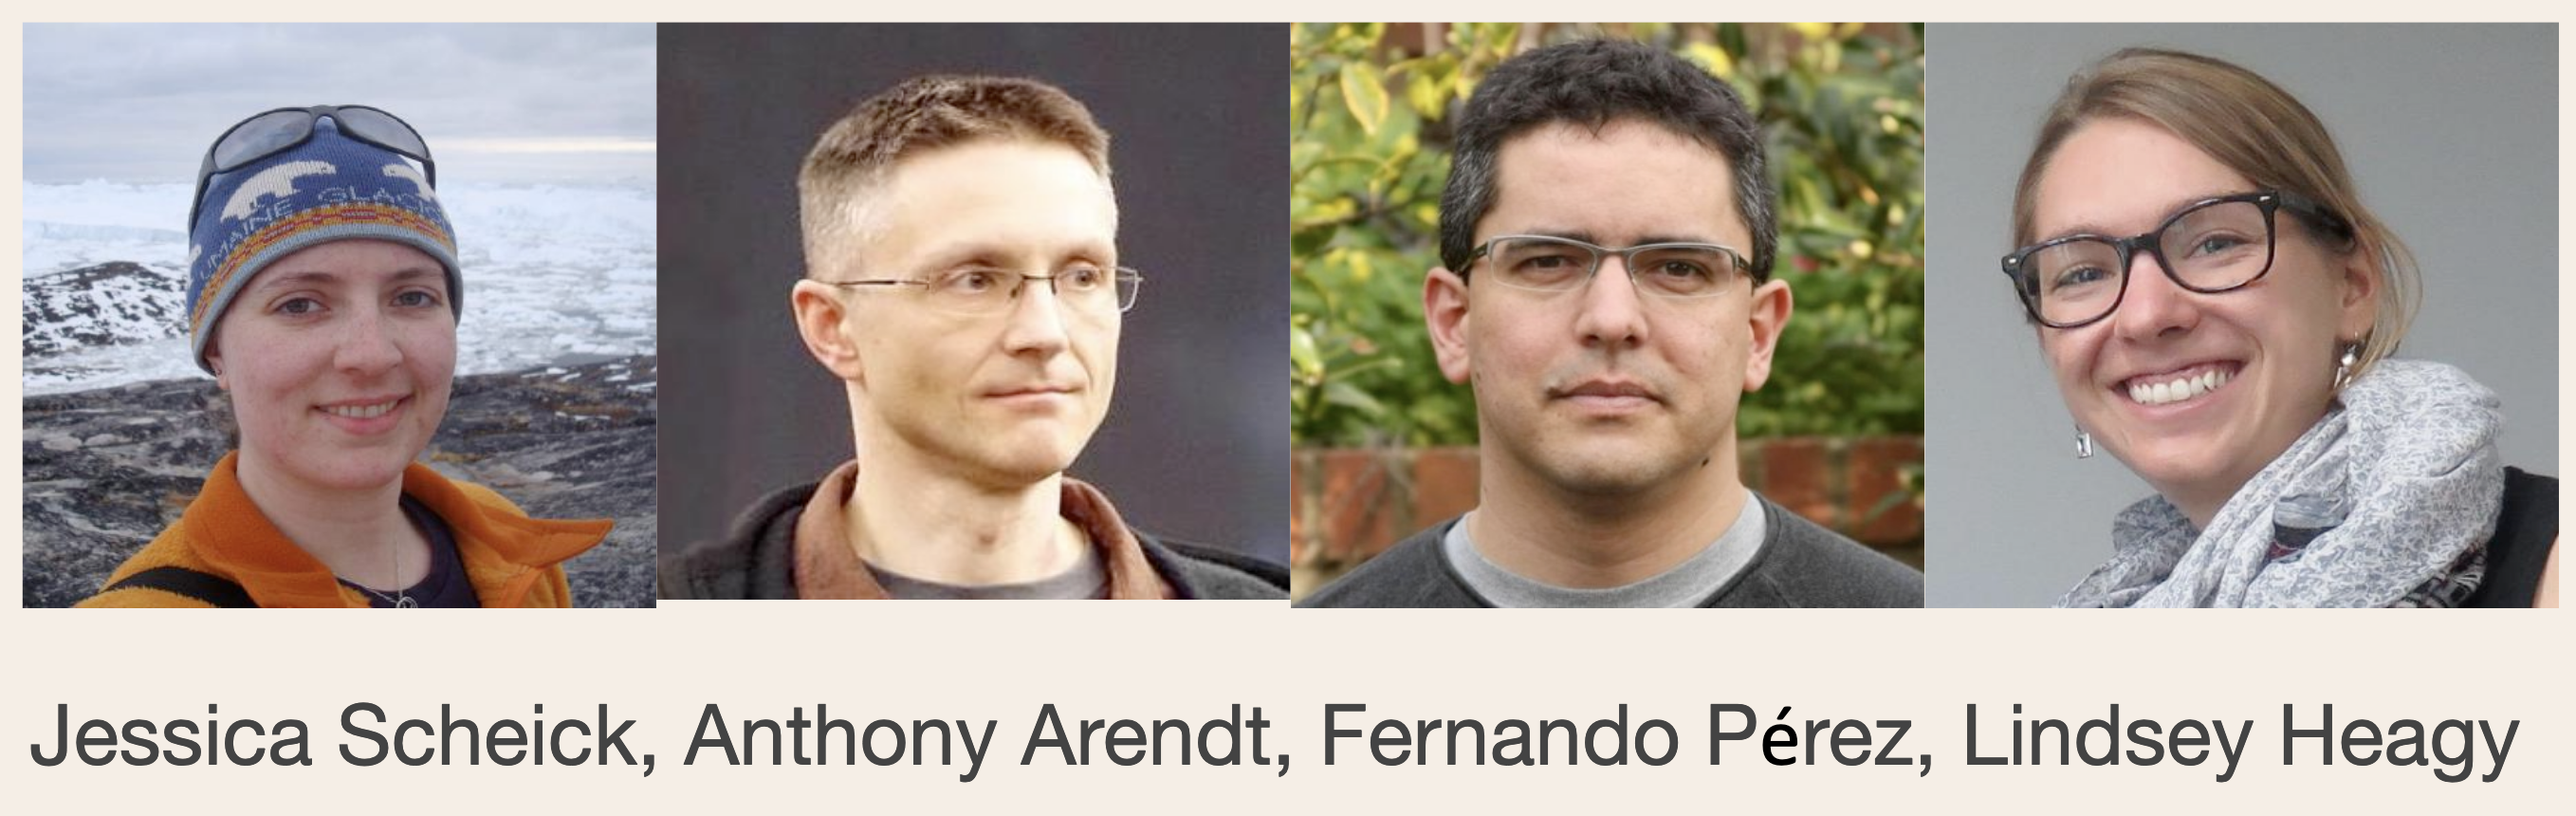

In [9]:
Image(url="https://drive.google.com/uc?export=download&id=1ver8zKbw7f7CfhwQrBKDbuNAQ7CcGgFJ", format='png', width=850, embed=True)

came together to continue developing an open-source community and set of software tools around ICESat-2.

Today, `icepyx` has dozens of [contributors](https://github.com/icesat2py/icepyx/blob/development/CONTRIBUTORS.rst) and was the taught programmatic access method for ICESat-2 data at the 2020 ICESat-2 Hackweek, greatly simplifying the portion of the research pipeline between data discovery, data access, and file management/analysis.

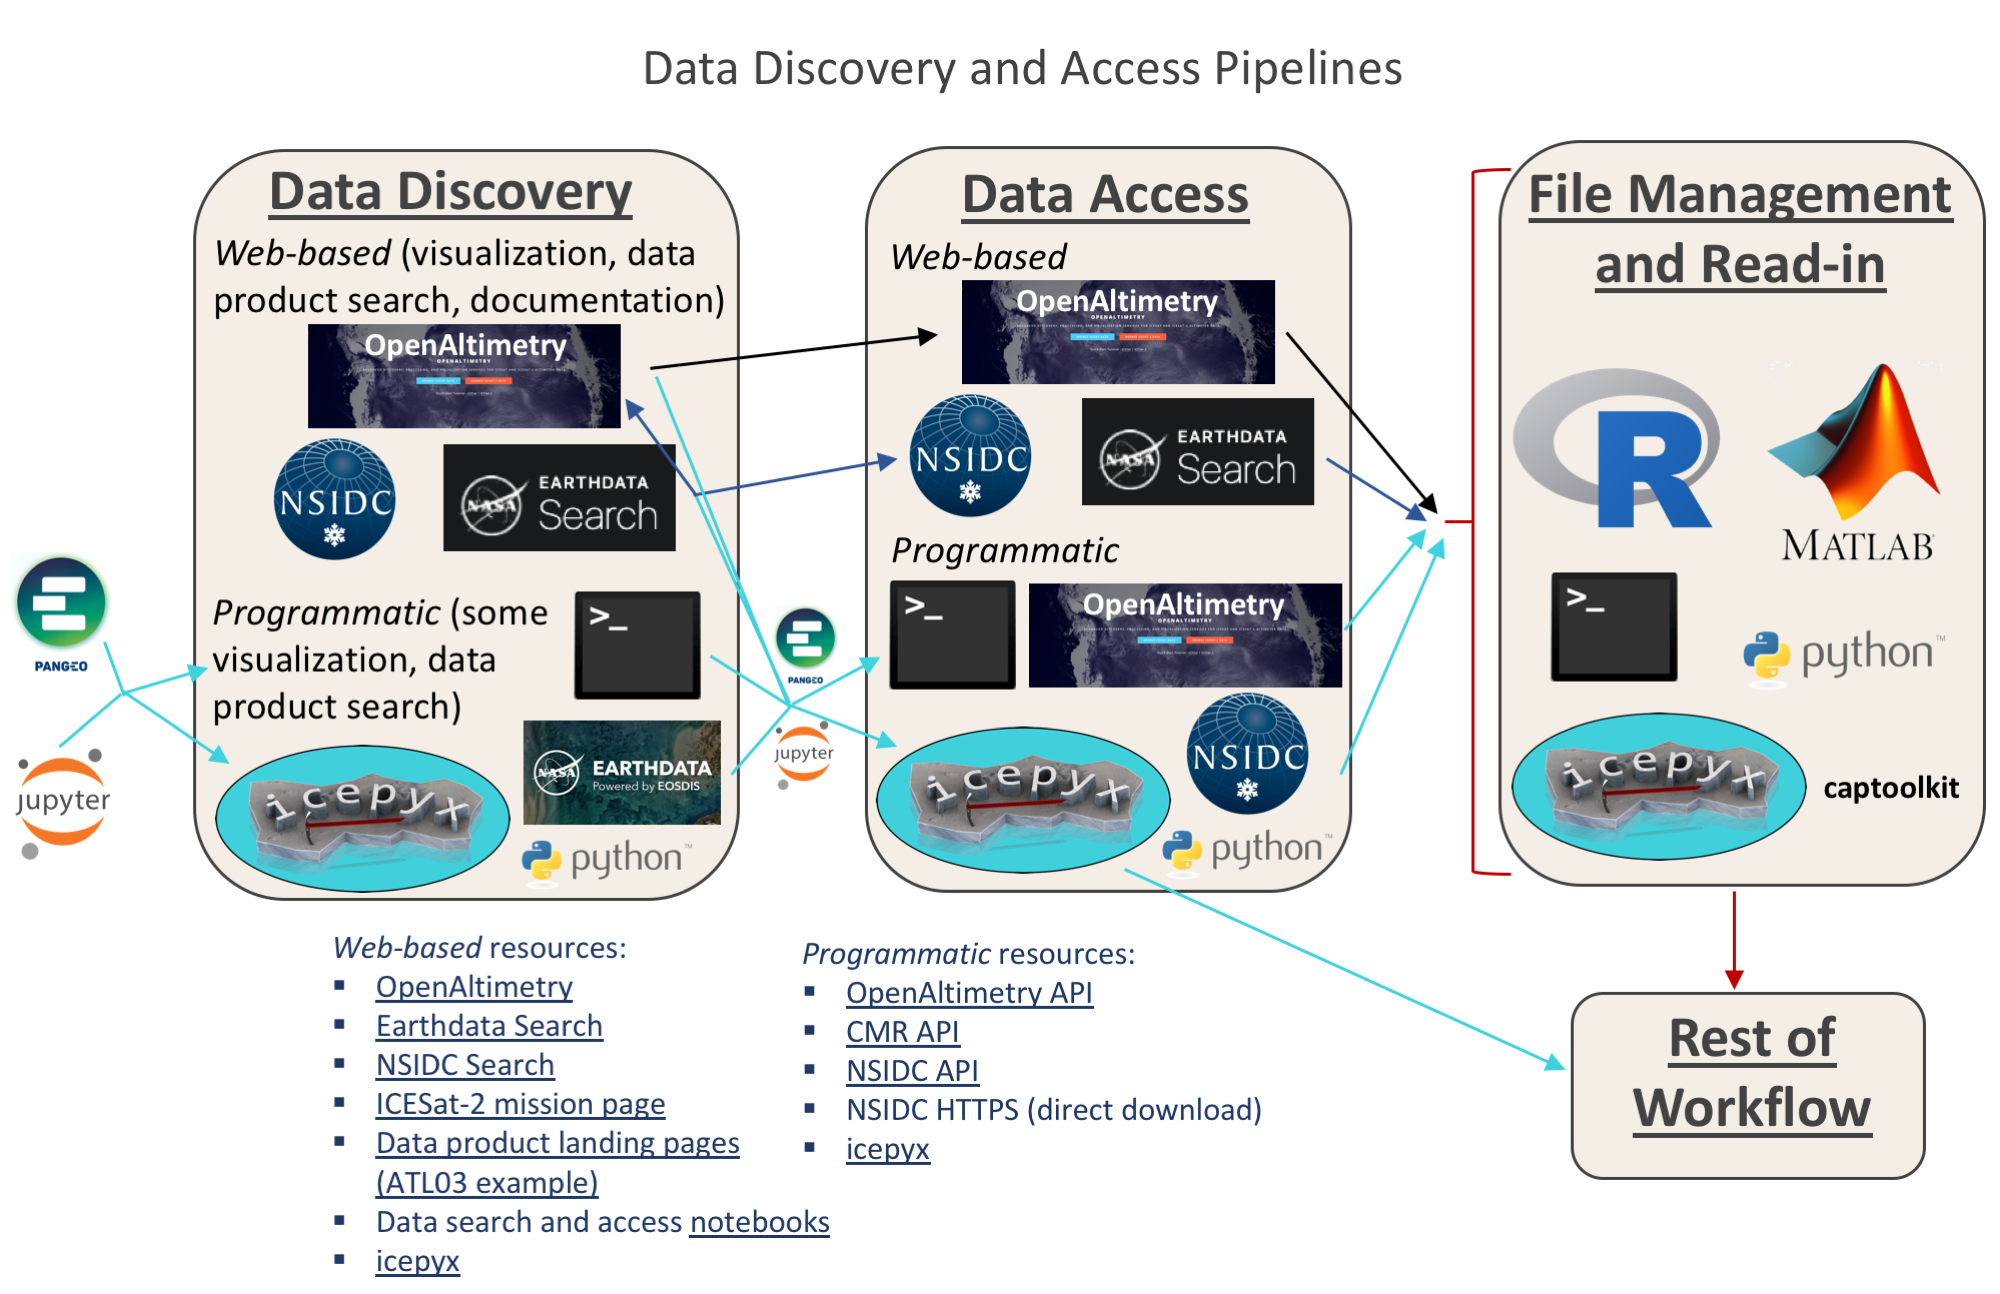

In [3]:
Image(url="https://drive.google.com/uc?export=download&id=1uCwo9o8WcKYtABQTyP0j2CTs_R5d7Vjd", format='png', width=850, embed=True)

## 3. What can it do (as of Sept. 2020)?

`icepyx` is under continual development, and new features are rapidly being added. Currently, the major functionality of `icepyx` is as a wrapper on top of the NSIDC API, created to make programmatic access to ICESat-2 data easier.

The next image shows a "block" or "uml" diagram of the public-facing components of the `icepyx` code infrastructure. It aims to show, in compact format, what the various classes and functions/methods of the library. Note that this version of the diagram does not include "hidden" parameters (those beginning with an underscore); a full diagram is available [here](https://github.com/icesat2py/icepyx/blob/development/doc/source/user_guide/documentation/icepyx_class_diagram_full.png).

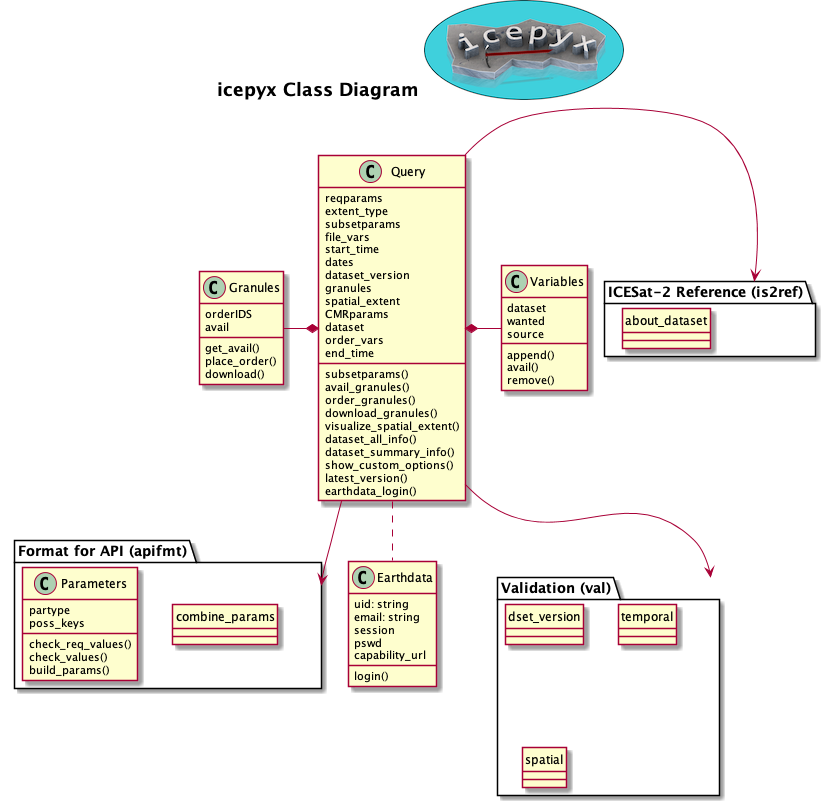

In [4]:
Image("../doc/source/user_guide/documentation/icepyx_class_diagram.png", width=800)

### Demo! (Quick-Start Guide)
The entire process of getting ICESat-2 data (from query to download) can ultimately be accomplished in three minimal lines of code:

`region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)`

`region_a.earthdata_login(earthdata_uid, email)`

`region_a.download_granules(path_to_store_data)`

where the function inputs are described in detail throughout the [intoductory data access tutorial](https://github.com/icesat2py/icepyx/blob/master/examples/ICESat-2_DAAC_DataAccess_Example.ipynb) and in the [documentation](https://icepyx.readthedocs.io/en/latest/user_guide/documentation/icepyx.html).

**This minimal example includes spatial and temporal subsetting (default) based on your input spatial and temporal extents. It does NOT include non-default subsetting and customization (e.g. variables, reformatting), which are covered in more detail in the [Subsetting Tutorial Notebook](https://github.com/icesat2py/icepyx/blob/master/examples/ICESat-2_DAAC_DataAccess2_Subsetting.ipynb).** The motivation for using some of the more detailed steps outlined in this notebook are that they provide the user with much more control over the data they download, ultimately saving time and effort later on in the processing and storage pipelines.

In [1]:
# assuming you have already installed the library (more on that below), import it
import icepyx as ipx
%matplotlib inline

#### Set up a simple ICESat-2 data query
Below is an example using a spatial extent over Pine Island Glacier.

In [2]:
# Pine Island Glacier
short_name = 'ATL06'
spatial_extent = [-102, -76, -98, -74.5]
date_range = ['2019-06-18','2019-06-25']

Create the data object using our inputs. Note the version warning if we specify an old version.

In [3]:
region_a = ipx.Query(short_name, spatial_extent, date_range, \
                           start_time='03:30:00', end_time='21:30:00', version='002')

/home/jovyan/icepyx/icepyx/core/validate_inputs.py:27: UserWarning: You are using an old version of this dataset
  warnings.warn("You are using an old version of this dataset")


Now re-populate the data object. Note that with no version or time specified, the defaults are used.

In [5]:
region_a = ipx.Query(short_name, spatial_extent, date_range)

Formatted parameters and function calls allow us to see the the properties of the data object we have created.

In [6]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)

ATL06
['2019-06-18', '2019-06-25']
00:00:00
23:59:59
003
['bounding box', [-102.0, -76.0, -98.0, -74.5]]


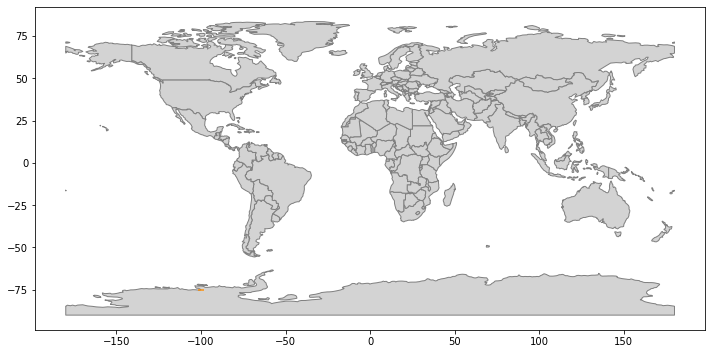

In [7]:
region_a.visualize_spatial_extent()

#### Built in methods allow us to get more information about our dataset
In addition to viewing the stored object information shown above (e.g. dataset, start and end date and time, version, etc.), we can also request summary information about the dataset itself or confirm that we have manually specified the latest version.

In [8]:
print(region_a.latest_version())
region_a.dataset_summary_info()

003
dataset_id :  ATLAS/ICESat-2 L3A Land Ice Height V003
short_name :  ATL06
version_id :  003
time_start :  2018-10-14T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL06) provides geolocated, land-ice surface heights (above the WGS 84 ellipsoid, ITRF2014 reference frame), plus ancillary parameters that can be used to interpret and assess the quality of the height estimates. The data were acquired by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory.
orbit_parameters :  {'swath_width': '36.0', 'period': '96.8', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}


In [9]:
#search for available granules and provide basic summary info about them
region_a.avail_granules()

{'Number of available granules': 4,
 'Average size of granules (MB)': 25.473045825950003,
 'Total size of all granules (MB)': 101.89218330380001}

In [10]:
#get a list of the available granule IDs that meet your search criteria
region_a.avail_granules(ids=True)

[['ATL06_20190621104104_12850312_003_01.h5',
  'ATL06_20190621212741_12920310_003_01.h5',
  'ATL06_20190625103243_13460312_003_01.h5',
  'ATL06_20190625211921_13530310_003_01.h5']]

#### Log in to Earthdata
Data access is behind the Earthdata authentication, so we must log in to order and download data from NSIDC.

In [ ]:
# Fill this in with your Earthdata Login user name and associated email

earthdata_uid = ''
email = ''
region_a.earthdata_login(earthdata_uid, email)

In [11]:
# icepyx development login

earthdata_uid = 'icepyx_devteam'
email = 'icepyx.dev@gmail.com'
region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ·········


#### Select default variables for order and download
Detailed variable selection is available. See this [example notebook](https://github.com/icesat2py/icepyx/blob/master/examples/ICESat-2_DAAC_DataAccess2_Subsetting.ipynb) for examples and explanations of all of `icepyx`'s capabilities.

In [25]:
region_a.order_vars.append(defaults=True)
pprint(region_a.order_vars.wanted)

{'atl06_quality_summary': ['gt1l/land_ice_segments/atl06_quality_summary',
                           'gt1r/land_ice_segments/atl06_quality_summary',
                           'gt2l/land_ice_segments/atl06_quality_summary',
                           'gt2r/land_ice_segments/atl06_quality_summary',
                           'gt3l/land_ice_segments/atl06_quality_summary',
                           'gt3r/land_ice_segments/atl06_quality_summary'],
 'atlas_sdp_gps_epoch': ['ancillary_data/atlas_sdp_gps_epoch'],
 'bsnow_conf': ['gt1l/land_ice_segments/geophysical/bsnow_conf',
                'gt1r/land_ice_segments/geophysical/bsnow_conf',
                'gt2l/land_ice_segments/geophysical/bsnow_conf',
                'gt2r/land_ice_segments/geophysical/bsnow_conf',
                'gt3l/land_ice_segments/geophysical/bsnow_conf',
                'gt3r/land_ice_segments/geophysical/bsnow_conf'],
 'bsnow_h': ['gt1l/land_ice_segments/geophysical/bsnow_h',
             'gt1r/land_ice_segment

##### Applying variable subsetting to your order and download

In order to have your wanted variable list included with your order, you must pass it as a keyword argument to the `subsetparams()` attribute or the `order_granules()` or `download_granules()` methods.

#### Place the data order
We can send the order to NSIDC using the `order_granules()` function. Information about the granules ordered and their status will be printed automatically as well as emailed to the address provided. Email notifications can be set to false but they remain on as the default behavior. Additional information on the order, including request URLs (like the direct API request that is submitted), can be viewed by setting the optional keyword input 'verbose' to True. The verbose output can be helpful for troubleshooting (e.g. if you get errors from the subsetter) and relates to the output you'll see from other NSIDC resources.

In [27]:
# With variable subsetting, if this is your first use of the Coverage keyword argument (kwarg):
region_a.order_granules(Coverage=region_a.order_vars.wanted)

Total number of data order requests is  1  for  4  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000000800696
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is:  complete_with_errors
NSIDC provided these error messages:
['178105053:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 'PT4.715S',
 'ICESAT2']
Your order is: complete_with_errors


#### Download the Order
Finally, we can download our order to a specified directory (which needs to have a full path but doesn't have to point to an existing directory) and the download status will be printed as the program runs. Additional information is again available by using the optional boolean keyword `verbose`.

In [31]:
path = './download'
region_a.download_granules(path)

Beginning download of zipped output...
Data request 5000000800696 of  1  order(s) is downloaded.
Download complete


If your data download has been interrupted for any reason (but your order was completed), you can restart the download and it will pick up where it left off (`region_a.download_granules(path,restart=True)`. If you have been forced to restart your kernel, you will need to re-initialize the icesat2data object (`region_a=ipd.Icesat2Data(short_name, spatial_extent...)`) and log in to Earthdata before skipping to this step.

The downloaded data files will automatically be unzipped and moved into the single directory specified in `path`. We are currently working on adding a keyword option that gives users the ability to not unzip their downloaded files.

## 4. Where’s it going?
"Oh, the places we'll go..." (~Dr. Suess)

`icepyx` has many [plans](https://github.com/icesat2py/icepyx/issues), and we'd love to have more through your contributions! Some pieces currently in the works:
* pre-order visualization of elevation data with OpenAltimetry's API (currently being tested and documented - see the development branch!)
* data management and read in (conversations are ongoing - please add your voice to this [critical conversation](https://discourse.pangeo.io/t/icepyx-python-tools-for-icesat-2-data/404/) about what formats we should focus on first)
* gallery of examples, including your ICESat-2 Cryospheric workflows!

Some of our [longer-term goals](https://icepyx.readthedocs.io/en/latest/contributing/development_plan.html):
* easy visualization and analysis of data through use of existing tools with customized ICESat-2 wrappers
* ability to apply common corrections
* **what else should we add to these lists?**

## 5. What’s in it for me?

* Fame, fortune, the appreciation of your colleagues, and well-documented, shareable, reusable code that enables others (and yourself in the future!) to easily build on your analyses without having to reinvent the code themselves.
* An expanded community of ICESat-2 data users who can provide thoughtful insights on your data wrangling struggles.
* Citeable software - we have plans to submit `icepyx` to JOSS (the Journal for Open Source Software)
* minimizes time spent getting and presprocessing data (which means more time for analysis and scientific discovery!)
* easy to install (see #7)
* Thoughtful, relevant guidance and resources to contribute, without having to become a software developer
* Easy transition to the cloud and cloud computing as data products become available there. `icepyx` hopes to serve as a wrapper on top of other libraries, making it easy to make the shift without having to rebuild your code from the ground up
* You still want more reasons?!

## 6. But I don’t know how to develop software…
Never fear! This is a friendly, welcoming community made up primarily of disciplinary researchers. What brings us together is our desire to collaborate on building better tools that enable us to spend less time and energy on data wrangling and more time doing science.

## 7. How do I get it?

It's as easy as running `pip install icepyx` from your terminal. We hope to be available via conda-forge soon (let us know if you want to help make this happen!).

## 8. How to get involved (resources)

In addition to the links throughout this presentation, 